In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/ukbb-tools/04_gwas/check_gwas/plots/gwas_plot_misc.R')


In [3]:
annot_f <- '/scratch/groups/mrivas/ukbb24983/cal/annotation_20201002/ukb24983_cal_cALL_v2_hg19.vep101-loftee.Csq.tsv.gz'

snpnet_betas_f <- '/scratch/groups/mrivas/projects/PRS/private_output/202009_batch/HC.1-400/HC303/2_refit/snpnet.tsv'


In [4]:
fread(annot_f, select=c('#CHROM', 'POS', 'ID', 'Allele', 'Csq', 'Consequence', 'SYMBOL', 'gnomAD_AF', 'LoF')) %>%
rename('CHROM'='#CHROM') %>%
mutate(CHROM=if_else(CHROM == 'XY', 'X', CHROM)) %>%
compute_gwas_plot_df() -> annot_df


In [5]:
snpnet_betas_f %>% fread() %>% select(-CHROM, -POS) %>% left_join(annot_df, by='ID') -> df



In [10]:
df %>%
mutate(
    SYMBOL = if_else(is.na(POScum), ID, SYMBOL),
    Csq    = if_else(is.na(POScum), 'pav', Csq),
    POScum = if_else(is.na(POScum), 1094272075, POScum)
) %>%
replace_na(list(SYMBOL='')) %>% 
mutate(repel_label = if_else(rank(-abs(BETA)) <= 30, SYMBOL, '')) %>%
plot_lake() + theme(legend.position = c(.8, .8)) -> p_lake


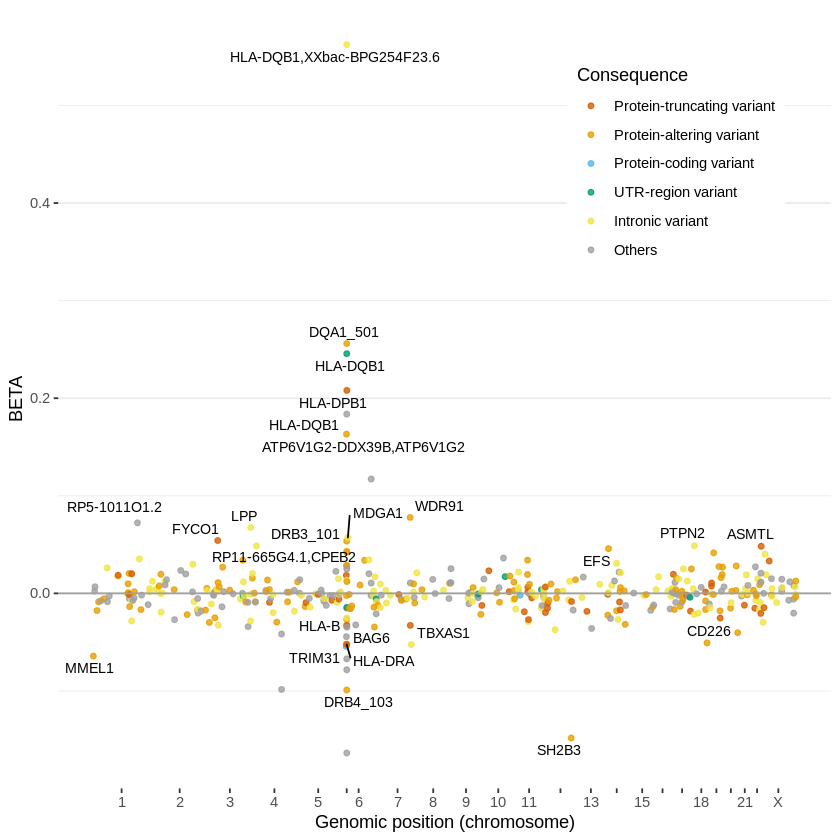

In [11]:
p_lake

In [12]:
ggsave('plots/p_lake.HC303.pdf', p_lake, width=6, height=6)
ggsave('plots/p_lake.HC303.png', p_lake, width=6, height=6)

In [12]:
df %>% arrange(POScum)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
rs1698683,C,T,0.062782900,1,144916676,T,ptv,stop_gained,PDE4DIP,0.2561,HC,144916676
rs863362,C,T,0.019156770,1,158549492,T,ptv,stop_gained,OR10X1,0.4743,HC,158549492
rs6025,T,C,-1.088674000,1,169519049,C,pav,missense_variant,F5,0.9804,NA,169519049
rs2236359,A,G,0.020316440,1,227935444,G,pav,missense_variant,SNAP47,0.4014,NA,227935444
rs34967813,A,G,0.024286010,1,237841390,G,pav,missense_variant,RYR2,0.2141,NA,237841390
rs11550699,A,G,0.012882790,2,233537125,G,pav,missense_variant,EFHD1,0.3877,NA,482759652
rs3732410,T,C,0.025481240,3,121415720,C,pav,missense_variant,GOLGB1,0.2313,NA,613679658
rs80215559,T,C,0.611839100,6,25918225,C,intron,intron_variant,SLC17A2,NA,NA,1087643421
rs10484432,G,A,0.095064790,6,26008876,A,others,upstream_gene_variant,U91328.22,NA,NA,1087734072
